### This is a notebook for comparing predicted segmentation with ground truth segmentations

In [1]:
import numpy as np
from cellpose import utils, dynamics, metrics
from numba import jit
from scipy.optimize import linear_sum_assignment
from scipy.ndimage import convolve, mean




In [2]:
x = "tile_0002_0029_seg.npy"

print(x.split('_')[-2][2:])



29


In [3]:
print((x.split('_')[-3] + x.split('_')[-2][2:]).strip('0'))

229


### Loading of *_seg.npy files which contains 

In [13]:
import numpy as np
import glob

# Path to directory containing .npy files
groundtruth_files_path = "../data/groundtruth_sample/"
predicted_files_path = "../data/predicted_sample/"

# Get list of all .npy files in the directory and sort them in numerical order
groundtruth_files = sorted(
    glob.glob(f"{groundtruth_files_path}/*.npy"),
    key=lambda x: int(x.split('_')[-3].lstrip('0') + x.split('_')[-2][2:].lstrip('0'))
)
predicted_files = sorted(
    glob.glob(f"{predicted_files_path}/*.npy"),
    key=lambda x: int(x.split('_')[-3].lstrip('0') + x.split('_')[-2][2:].lstrip('0'))
)

# Load each .npy file into a list and extract only the 'masks' field
groundtruth_list = [np.load(file, allow_pickle=True).item()['masks'] for file in groundtruth_files]
predicted_list = [np.load(file, allow_pickle=True).item()['masks'] for file in predicted_files]

print("Number of .npy files loaded:", len(groundtruth_list))

# Accessing the 'masks' directly from the lists
masks_true = groundtruth_list
masks_pred = predicted_list

print(groundtruth_files)
print(predicted_files)

Number of .npy files loaded: 23
['../data/groundtruth_sample/tile_0002_0025_seg.npy', '../data/groundtruth_sample/tile_0002_0026_seg.npy', '../data/groundtruth_sample/tile_0002_0027_seg.npy', '../data/groundtruth_sample/tile_0002_0028_seg.npy', '../data/groundtruth_sample/tile_0002_0029_seg.npy', '../data/groundtruth_sample/tile_0002_0030_seg.npy', '../data/groundtruth_sample/tile_0002_0031_seg.npy', '../data/groundtruth_sample/tile_0002_0033_seg.npy', '../data/groundtruth_sample/tile_0030_0008_seg.npy', '../data/groundtruth_sample/tile_0030_0009_seg.npy', '../data/groundtruth_sample/tile_0031_0008_seg.npy', '../data/groundtruth_sample/tile_0031_0009_seg.npy', '../data/groundtruth_sample/tile_0030_0010_seg.npy', '../data/groundtruth_sample/tile_0030_0011_seg.npy', '../data/groundtruth_sample/tile_0030_0012_seg.npy', '../data/groundtruth_sample/tile_0030_0013_seg.npy', '../data/groundtruth_sample/tile_0030_0014_seg.npy', '../data/groundtruth_sample/tile_0030_0015_seg.npy', '../data/grou

In [5]:
avr_precision = metrics.average_precision(masks_true, masks_pred)
#print("average precision:", avr_precision)


In [6]:

import matplotlib.pyplot as plt

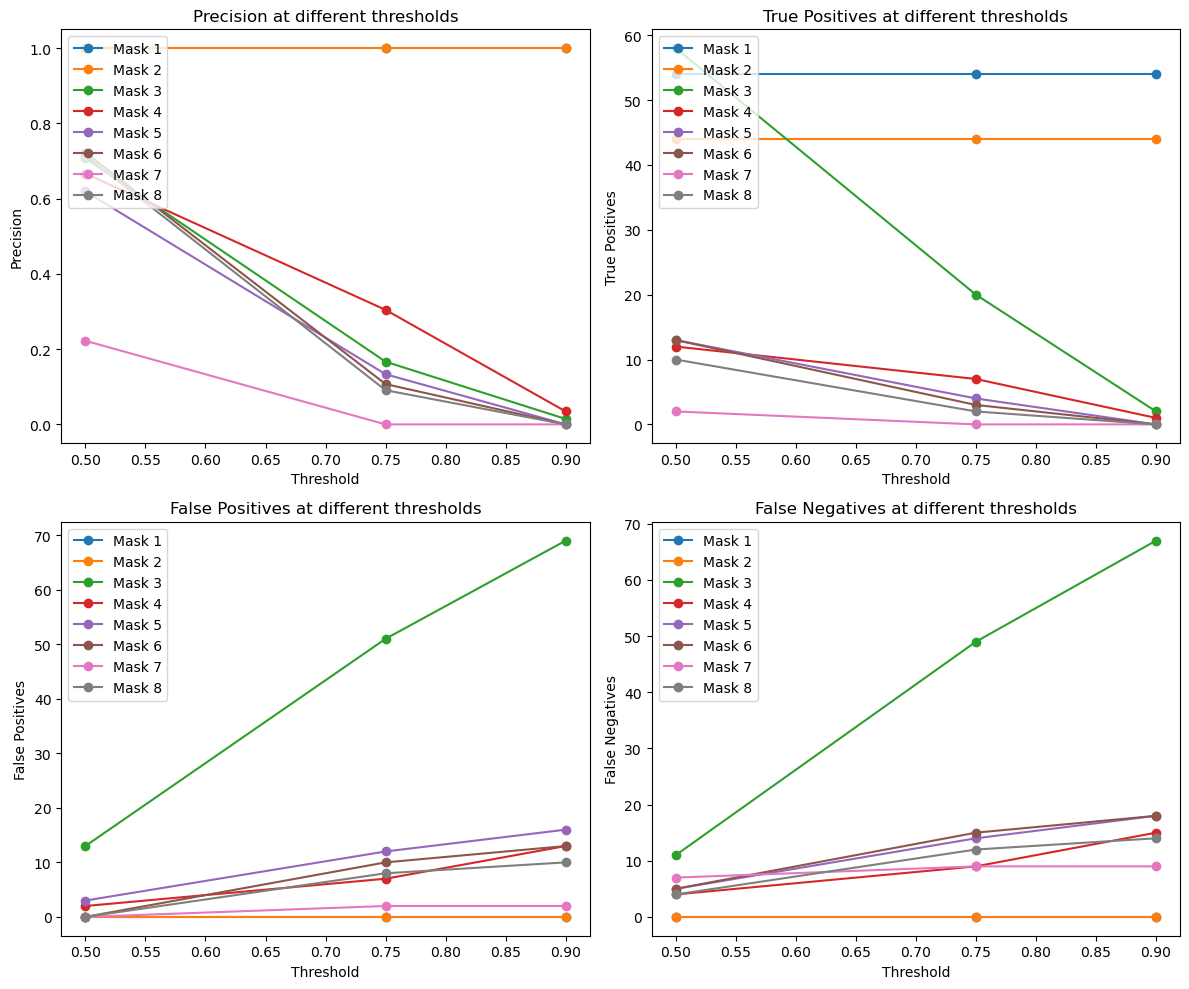

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from cellpose import metrics

# Assuming you already have masks_true and masks_pred defined
# You can compute the average precision as follows:
avr_precision = metrics.average_precision(masks_true, masks_pred)

# Extract values from the output
precision = avr_precision[0]  # Precision at different thresholds
tp = avr_precision[1]         # True Positives at different thresholds
fp = avr_precision[2]         # False Positives at different thresholds
fn = avr_precision[3]         # False Negatives at different thresholds

# Set up the plot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Precision at different thresholds
axs[0, 0].plot([0.5, 0.75, 0.9], precision.T, marker='o')
axs[0, 0].set_title('Precision at different thresholds')
axs[0, 0].set_xlabel('Threshold')
axs[0, 0].set_ylabel('Precision')
axs[0, 0].legend([f'Mask {i+1}' for i in range(precision.shape[0])], loc='upper left')

# Plot 2: True Positives at different thresholds
axs[0, 1].plot([0.5, 0.75, 0.9], tp.T, marker='o')
axs[0, 1].set_title('True Positives at different thresholds')
axs[0, 1].set_xlabel('Threshold')
axs[0, 1].set_ylabel('True Positives')
axs[0, 1].legend([f'Mask {i+1}' for i in range(tp.shape[0])], loc='upper left')

# Plot 3: False Positives at different thresholds
axs[1, 0].plot([0.5, 0.75, 0.9], fp.T, marker='o')
axs[1, 0].set_title('False Positives at different thresholds')
axs[1, 0].set_xlabel('Threshold')
axs[1, 0].set_ylabel('False Positives')
axs[1, 0].legend([f'Mask {i+1}' for i in range(fp.shape[0])], loc='upper left')

# Plot 4: False Negatives at different thresholds
axs[1, 1].plot([0.5, 0.75, 0.9], fn.T, marker='o')
axs[1, 1].set_title('False Negatives at different thresholds')
axs[1, 1].set_xlabel('Threshold')
axs[1, 1].set_ylabel('False Negatives')
axs[1, 1].legend([f'Mask {i+1}' for i in range(fn.shape[0])], loc='upper left')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [8]:
import numpy as np
from cellpose import plot, utils, io
dat = np.load(groundtruth_files_path + 'tile_0002_0025_seg.npy', allow_pickle=True).item()
img = io.imread('../data/raw_sample/tile_0002_0025.jpg')


dat.keys()

dict_keys(['outlines', 'masks', 'chan_choose', 'ismanual', 'filename', 'flows', 'diameter'])

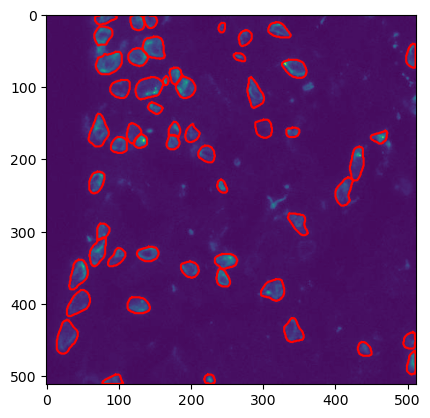

In [9]:
import numpy as np
from cellpose import plot, utils, io


dat1 = np.load(groundtruth_files_path + 'tile_0002_0031_seg.npy', allow_pickle=True).item()
dat2 = np.load(predicted_files_path + 'tile_0002_0025_seg.npy', allow_pickle=True).item()

img = io.imread('../data/raw_sample/tile_0002_0025.jpg')

# plot image with masks overlaid
mask_RGB = plot.mask_overlay(img, dat['masks'])

# plot image with outlines overlaid in red
outlines = utils.outlines_list(dat['masks'])
plt.imshow(img)
for o in outlines:
    plt.plot(o[:,0], o[:,1], color='r')

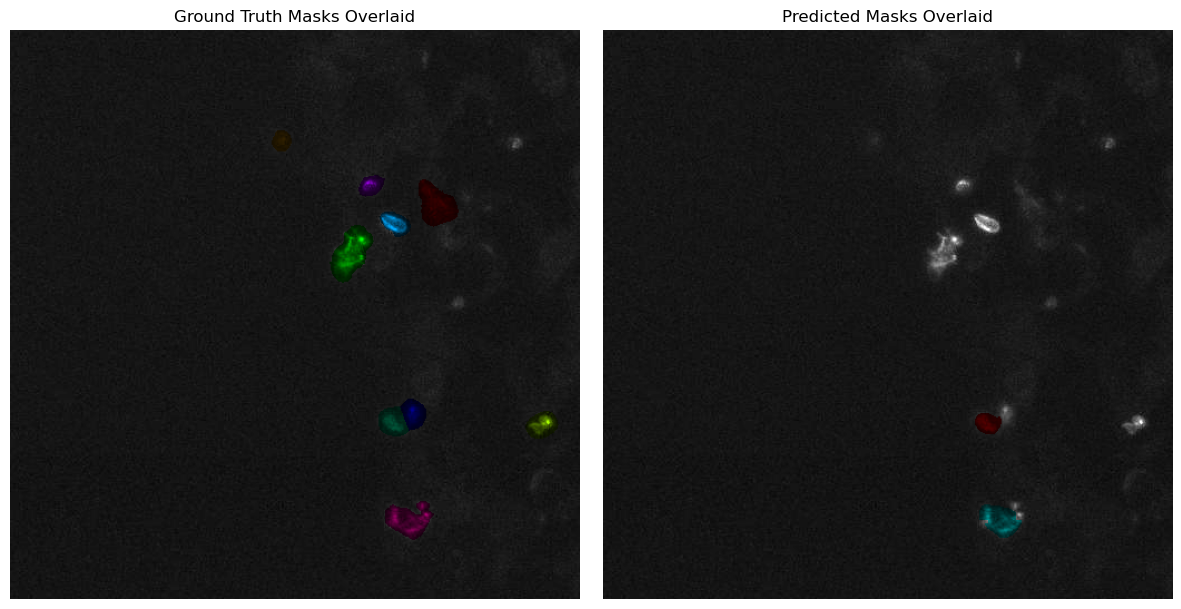

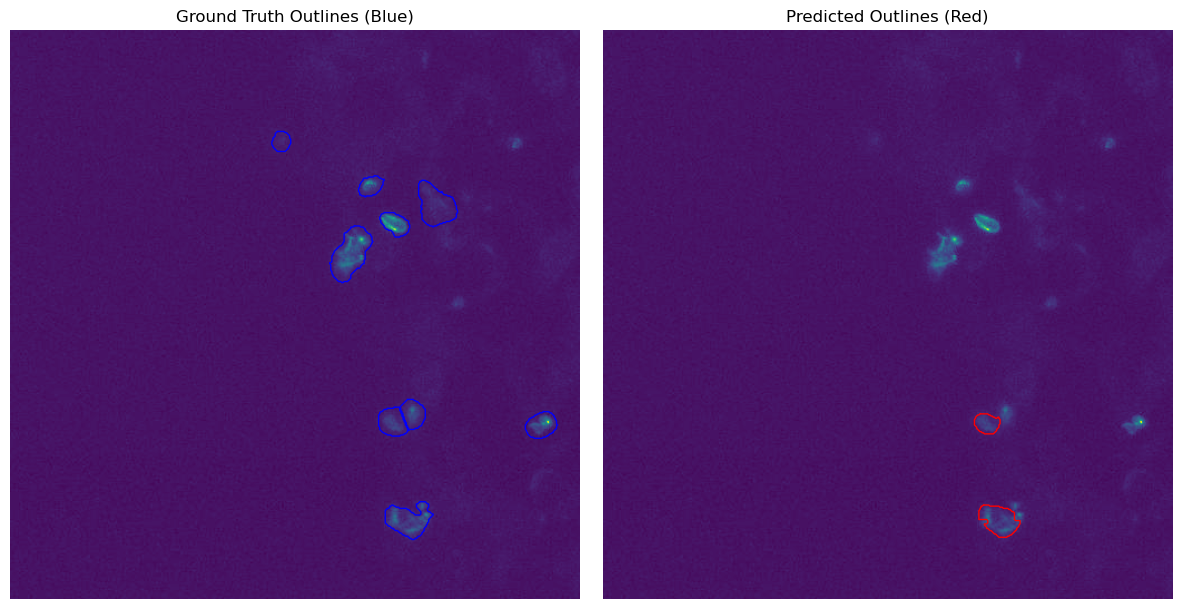

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from cellpose import plot, utils, io

# Load the ground truth and predicted masks
dat1 = np.load(groundtruth_files_path + 'tile_0002_0031_seg.npy', allow_pickle=True).item()  # Ground truth
dat2 = np.load(predicted_files_path + 'tile_0002_0031_seg.npy', allow_pickle=True).item()  # Predicted

# Load the image
img = io.imread('../data/raw_sample/tile_0002_0031.jpg')

# Set up the plot for side-by-side comparison
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the ground truth masks overlay (using 'dat1') on the left side
mask_RGB_gt = plot.mask_overlay(img, dat1['masks'])
axs[0].imshow(mask_RGB_gt)
axs[0].set_title("Ground Truth Masks Overlaid")
axs[0].axis('off')  # Turn off axis for better visualization

# Plot the predicted masks overlay (using 'dat2') on the right side
mask_RGB_pred = plot.mask_overlay(img, dat2['masks'])
axs[1].imshow(mask_RGB_pred)
axs[1].set_title("Predicted Masks Overlaid")
axs[1].axis('off')  # Turn off axis for better visualization

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# Now, plot outlines for both ground truth (dat1) and predicted (dat2)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Get outlines for ground truth (dat1) and predicted masks (dat2)
outlines_gt = utils.outlines_list(dat1['masks'])  # Outlines for ground truth
outlines_pred = utils.outlines_list(dat2['masks'])  # Outlines for predicted masks

# Plot ground truth outlines (blue) on the left side
axs[0].imshow(img)
for o in outlines_gt:
    axs[0].plot(o[:, 0], o[:, 1], color='b', lw=1)
axs[0].set_title("Ground Truth Outlines (Blue)")
axs[0].axis('off')

# Plot predicted outlines (red) on the right side
axs[1].imshow(img)
for o in outlines_pred:
    axs[1].plot(o[:, 0], o[:, 1], color='r', lw=1)
axs[1].set_title("Predicted Outlines (Red)")
axs[1].axis('off')

# Adjust layout for better spacing between subplots
plt.tight_layout()

# Show the outline comparison plot
plt.show()
